In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_moons, make_circles
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

from src.nn import Dense as mDense
from src.nn import Dropout as mDropout
from src.nn import ReLU, Softmax, NeuralNetwork

%matplotlib inline

np.seterr(all='raise')
np.random.seed(42)

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

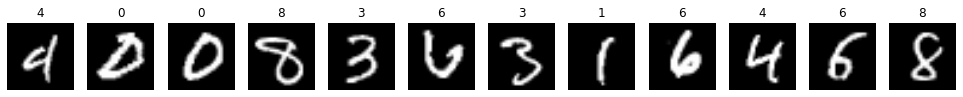

In [3]:
plt.figure(figsize=(17, 8))
indexes = np.random.randint(0, 60000, 12)
for i, idx in enumerate(indexes):
    label = y_train[idx]
    image = x_train[idx]
    plt.subplot(2, 12, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray', interpolation='bilinear')
    plt.title('%i' % label)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
input_shape = (x_train.shape[1], )
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [5]:
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation=tf.nn.relu))
model.add(Dropout(.5))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy' , optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15, batch_size=32)
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.argmax(model.predict(x_test), axis=-1)
print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

W0703 08:41:55.460414 140420057129088 deprecation.py:506] From /home/rdenadai/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/15
60000/60000 [==============================] - 3s 43us/sample - loss: 0.8700 - acc: 0.7401
Epoch 2/15
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4942 - acc: 0.8573
Epoch 3/15
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4206 - acc: 0.8784
Epoch 4/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3786 - acc: 0.8928
Epoch 5/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3457 - acc: 0.9001
Epoch 6/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3290 - acc: 0.9052
Epoch 7/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3067 - acc: 0.9118
Epoch 8/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2944 - acc: 0.9158
Epoch 9/15
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2808 - acc: 0.9198
Epoch 10/15
60000/60000 [==============================] - 3s 44us/sample - loss: 

--------------------
Treinamento:
Epoch 1/25 =======> Loss: 1.63134 - Acc: 52.0%
Epoch 2/25 =======> Loss: 1.2472 - Acc: 65.0%
Epoch 3/25 =======> Loss: 1.04689 - Acc: 72.0%
Epoch 4/25 =======> Loss: 0.9384 - Acc: 76.0%
Epoch 5/25 =======> Loss: 0.86537 - Acc: 78.0%
Epoch 6/25 =======> Loss: 0.81292 - Acc: 80.0%
Epoch 7/25 =======> Loss: 0.77199 - Acc: 81.0%
Epoch 8/25 =======> Loss: 0.74386 - Acc: 82.0%
Epoch 9/25 =======> Loss: 0.72585 - Acc: 83.0%
Epoch 10/25 =======> Loss: 0.70113 - Acc: 84.0%
Epoch 11/25 =======> Loss: 0.6841 - Acc: 84.0%
Epoch 12/25 =======> Loss: 0.675 - Acc: 85.0%
Epoch 13/25 =======> Loss: 0.65578 - Acc: 85.0%
Epoch 14/25 =======> Loss: 0.65221 - Acc: 86.0%
Epoch 15/25 =======> Loss: 0.64905 - Acc: 85.0%
Epoch 16/25 =======> Loss: 0.62723 - Acc: 86.0%
Epoch 17/25 =======> Loss: 0.62114 - Acc: 86.0%
Epoch 18/25 =======> Loss: 0.61608 - Acc: 87.0%
Epoch 19/25 =======> Loss: 0.61934 - Acc: 87.0%
Epoch 20/25 =======> Loss: 0.60229 - Acc: 87.0%
Epoch 21/25 =======>

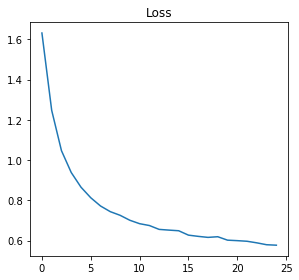

In [8]:
final_error = []
better_acc = 0

layers = (
    mDense(inputs=x_train.shape[1], outputs=100, activation=ReLU),
    mDropout(100, 100, probability=.5),
    mDense(inputs=100, outputs=10, activation=Softmax),
)

md = NeuralNetwork(layers, batch_size=32)
print('-' * 20)
print('Treinamento:')
error = md.train(x_train.copy(), y_train.copy(), epochs=25, show_iter_err=1)

y_pred = md.predict(x_test.copy())
acc = np.round((np.sum(y_pred == y_test) / len(y_test)) * 100, 2)
if acc > better_acc:
    better_acc = acc
final_error = error
print('-' * 20)
print(f'Acurácia: {acc}%')

print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

if len(final_error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(final_error)), final_error)
    plt.tight_layout()
    plt.show()